### <font color='red'> Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.

# Regression

In [2]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

In [3]:
reg_data = pd.read_csv("Twitter.data", header = None, names = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Buzz'])

In [4]:
reg_data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [5]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0        583250 non-null int64
NCD_1        583250 non-null int64
NCD_2        583250 non-null int64
NCD_3        583250 non-null int64
NCD_4        583250 non-null int64
NCD_5        583250 non-null int64
NCD_6        583250 non-null int64
AI_0         583250 non-null int64
AI_1         583250 non-null int64
AI_2         583250 non-null int64
AI_3         583250 non-null int64
AI_4         583250 non-null int64
AI_5         583250 non-null int64
AI_6         583250 non-null int64
AS(NA)_0     583250 non-null float64
AS(NA)_1     583250 non-null float64
AS(NA)_2     583250 non-null float64
AS(NA)_3     583250 non-null float64
AS(NA)_4     583250 non-null float64
AS(NA)_5     583250 non-null float64
AS(NA)_6     583250 non-null float64
BL_0         583250 non-null float64
BL_1         583250 non-null float64
BL_2         583250 non-null float64
BL_3         583250 non-null 

In [6]:
reg_data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


## Data Leakage

In [7]:
X = reg_data.drop(['Buzz'], axis=1)
Y = reg_data['Buzz']

columns = X.values
target = Y.values

corr_list = [];
for i in range(0,77):
   corr_list.append(np.corrcoef(columns[:,i] , target)[0,1])

print(corr_list)

[0.8833155443443067, 0.8898837376563945, 0.8751676884451048, 0.8730600966594706, 0.8862617359286312, 0.9185645412746013, 0.9553295886490557, 0.7865909480947977, 0.7860654492055676, 0.7693692574989077, 0.7565560214934793, 0.7562185053214157, 0.7868145889574167, 0.8237510963301806, 0.8433572774123586, 0.8402291403486734, 0.8192253372791539, 0.8082579519210333, 0.8036910395207559, 0.8143807201206573, 0.8355973985862507, 0.0851473529275373, 0.07745903272873246, 0.09117479755212841, 0.08504087154787025, 0.07943779622388142, 0.06362667017625932, 0.06512638917834854, 0.8755331607773036, 0.8835891065751136, 0.8698432470483437, 0.8693013763593938, 0.8833273481338701, 0.9151097701151432, 0.9518090542900172, 0.8539916264226788, 0.850497709936626, 0.8377564912527721, 0.8340529311348905, 0.8334539919539738, 0.8450926583688018, 0.8663135588898918, 0.08297451196377098, 0.07566439032078387, 0.08956021379161967, 0.08307780913378349, 0.077112981960014, 0.06051960590748508, 0.061593327441800474, 0.010956

## Creating Random Sample
We used only 1% of the data because with 10%, the models took an extremely long time to execute.

In [8]:
from sklearn.model_selection import train_test_split

_, sample_data, _, sample_target = train_test_split(X, Y, shuffle = True, test_size = 0.01, random_state = 0)

sample_data.shape

(5833, 77)

## Scaling
MinMaxScaler is used because it does not change the underlying behavior of the data.

In [9]:
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [10]:
from sklearn.model_selection import GridSearchCV

## K Neighbors Regressor

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg_param_grid = {'n_neighbors': [1, 5, 10, 15, 20]}
knn_reg_grid_search = GridSearchCV(knn_reg, knn_reg_param_grid, c=5, return_train_score=True)
knn_reg_grid_search.fit(X_train, y_train)

print("Best parameter: {}".format(knn_reg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(knn_reg_grid_search.best_score_))
print("Test set score: {:.2f}".format(knn_reg_grid_search.score(X_test, y_test)))

report_table = [['K Neighbors Regressor', knn_reg_grid_search.best_params_, knn_reg_grid_search.score(X_train, y_train), knn_reg_grid_search.score(X_test, y_test)]]

Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.87
Test set score: 0.79


([<matplotlib.axis.XTick at 0x186811f4898>,
 <a list of 5 Text xticklabel objects>)

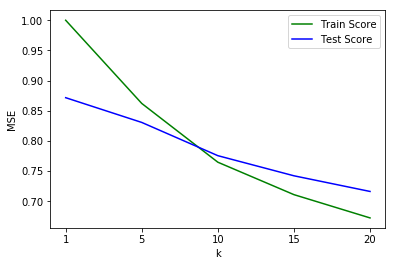

In [32]:
results = pd.DataFrame(knn_reg_grid_search.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)

x_axis = range(1,6)
my_xticks = knn_reg_param_grid['n_neighbors']
plt.plot(x_axis, train_scores, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_scores, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')
plt.xticks(x_axis, my_xticks)

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg_param_grid = {}
lreg_grid_search = GridSearchCV(lreg, lreg_param_grid, cv=5, return_train_score=True)
lreg_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(lreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(lreg_grid_search.best_score_))
print("Test set score: {:.2f}".format(lreg_grid_search.score(X_test, y_test)))

report_table = report_table + [['Linear Regression', lreg_grid_search.best_params_, lreg_grid_search.best_score_, lreg_grid_search.score(X_test, y_test)]]

Best parameters: {}
Best cross-validation score: 0.95
Test set score: 0.94


Text(0.5, 0, 'RM')

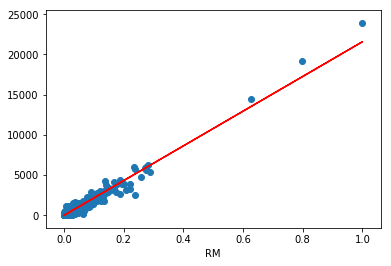

In [15]:
X_train_rm = X_train[:,76].reshape(-1,1)
lreg_grid_search.fit(X_train_rm, y_train)
y_predict = lreg_grid_search.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

## Polynomial Regression

In [35]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import Pipeline


pipe = Pipeline([('poly', PolynomialFeatures()), ('lreg', LinearRegression())])
poly_param_grid = {'poly__degree': [1, 2]}
poly_grid_search = GridSearchCV(pipe, poly_param_grid, cv=5, return_train_score=True)
poly_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(poly_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(poly_grid_search.best_score_))
print("Test set score: {:.2f}".format(poly_grid_search.score(X_test, y_test)))

report_table = report_table + [['Polynomial Regression', poly_grid_search.best_params_, poly_grid_search.best_score_, poly_grid_search.score(X_test, y_test)]]

Best parameters: {'poly__degree': 1}
Best cross-validation score: 0.95
Test set score: 0.94


([<matplotlib.axis.XTick at 0x186d88712b0>,
 <a list of 2 Text xticklabel objects>)

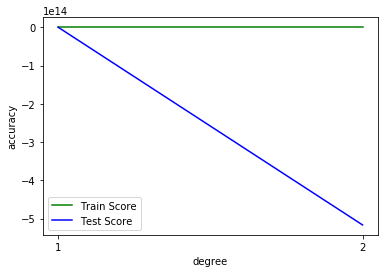

In [17]:
results = pd.DataFrame(poly_grid_search.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)

x_axis = range(1,3)
my_xticks = poly_param_grid['poly__degree']
plt.plot(x_axis, train_scores, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_scores, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.xticks(x_axis, my_xticks)

## Ridge

In [18]:
from  sklearn.linear_model import Ridge

ridge = Ridge()
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(ridge_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(ridge_grid_search.best_score_))
print("Test set score: {:.2f}".format(ridge_grid_search.score(X_test, y_test)))

report_table = report_table + [['Ridge', ridge_grid_search.best_params_, ridge_grid_search.best_score_, ridge_grid_search.score(X_test, y_test)]]

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.96
Test set score: 0.94


([<matplotlib.axis.XTick at 0x18680499c18>,
 <a list of 7 Text xticklabel objects>)

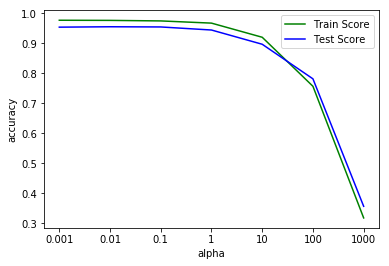

In [19]:
results = pd.DataFrame(ridge_grid_search.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)

x_axis = range(1,8)
my_xticks = ridge_param_grid['alpha']
plt.plot(x_axis, train_scores, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_scores, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.xticks(x_axis, my_xticks)

## Lasso

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=5, return_train_score=True)
lasso_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(lasso_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(lasso_grid_search.best_score_))
print("Test set score: {:.2f}".format(lasso_grid_search.score(X_test, y_test)))

report_table = report_table + [['Lasso', lasso_grid_search.best_params_, lasso_grid_search.best_score_, lasso_grid_search.score(X_test, y_test)]]

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.95
Test set score: 0.93


([<matplotlib.axis.XTick at 0x186804ba518>,
 <a list of 7 Text xticklabel objects>)

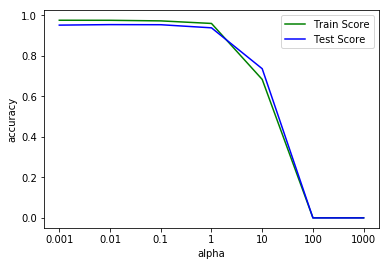

In [21]:
results = pd.DataFrame(lasso_grid_search.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)

x_axis = range(1,8)
my_xticks = lasso_param_grid['alpha']
plt.plot(x_axis, train_scores, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_scores, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.xticks(x_axis, my_xticks)

## LinearSVR

In [22]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR()
lsvr_param_grid = {}
lsvr_grid_search = GridSearchCV(lsvr, lsvr_param_grid, cv=5, return_train_score=True)
lsvr_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(lsvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(lsvr_grid_search.best_score_))
print("Test set score: {:.2f}".format(lsvr_grid_search.score(X_test, y_test)))

report_table = report_table + [['Linear SVR', lsvr_grid_search.best_params_, lsvr_grid_search.best_score_, lsvr_grid_search.score(X_test, y_test)]]

Best parameters: {}
Best cross-validation score: 0.24
Test set score: 0.31


## SVR with Kernel trick

In [23]:
from sklearn.svm import SVR

svr = SVR()
svr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
svr_grid_search = GridSearchCV(svr, svr_param_grid, cv=5, return_train_score=True)
svr_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(svr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(svr_grid_search.best_score_))
print("Test set score: {:.2f}".format(svr_grid_search.score(X_test, y_test)))

report_table = report_table + [['SVR With Kernel', svr_grid_search.best_params_, svr_grid_search.best_score_, svr_grid_search.score(X_test, y_test)]]

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.55
Test set score: 0.68


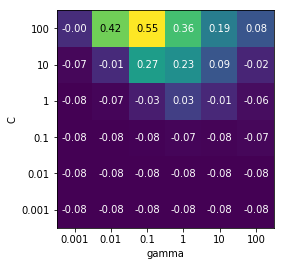

In [24]:
results = pd.DataFrame(svr_grid_searchid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=svr_param_grid['gamma'], ylabel='C', yticklabels=svr_param_grid['C'], cmap="viridis")

## Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor()
d = np.arange(20)+1
dtree_reg_param_grid = {'max_depth': d, 'random_state': [0]}
dtree_reg_grid_search = GridSearchCV(dtree_reg, dtree_reg_param_grid, cv=5, return_train_score=True)
dtree_reg_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(dtree_reg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(dtree_reg_grid_search.best_score_))
print("Test set score: {:.2f}".format(dtree_reg_grid_search.score(X_test, y_test)))

report_table = report_table + [['Decision Tree Regressor', dtree_reg_grid_search.best_params_, dtree_reg_grid_search.best_score_, dtree_reg_grid_search.score(X_test, y_test)]]

Best parameters: {'max_depth': 5, 'random_state': 0}
Best cross-validation score: 0.92
Test set score: 0.88


In [26]:
dtree_reg_grid_search.best_estimator_.feature_importances_

array([3.33567094e-04, 3.71948742e-04, 0.00000000e+00, 0.00000000e+00,
       3.35097514e-03, 1.54187471e-03, 2.88946764e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.57120926e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.66053588e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.68283794e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

([<matplotlib.axis.XTick at 0x186811431d0>,
 <a list of 20 Text xticklabel objects>)

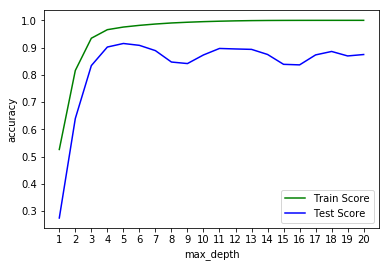

In [27]:
results = pd.DataFrame(dtree_reg_grid_search.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)

x_axis = range(1,21)
my_xticks = dtree_reg_param_grid['max_depth']
plt.plot(x_axis, train_scores, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_scores, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(x_axis, my_xticks)

In [28]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Best Cross validation score', 'Test score'])
report = report.set_index(report.columns[0])
report

,Model parameter,Best Cross validation score,Test score
Model name,,,
K Neighbors Regressor,{'n_neighbors': 1},1.000000,0.785349
Linear Regression,{},0.949984,0.935679
Polynomial Regression,{'poly__degree': 1},0.949984,0.935679
Ridge,{'alpha': 0.01},0.955183,0.935379
Lasso,{'alpha': 0.01},0.954844,0.934036
Linear SVR,{},0.242806,0.305750
SVR With Kernel,"{'C': 100, 'gamma': 0.1}",0.554555,0.675659
Decision Tree Regressor,"{'max_depth': 5, 'random_state': 0}",0.915036,0.879648


In [30]:
report.to_csv("project2_classificationScores.csv",sep=',')

## Best Model
The best model is Linear Regression because it has the highest test score and the difference between the train and test score is the least. Linear Regression does not have any hyperparameters. Ridge and Lasso also perform quite well. Training on the entire dataset using Linear Regression gives the following result:

In [27]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, Y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

lreg = LinearRegression()
lreg.fit(X_train,y_train)

print("Train set score: {:.2f}".format(lreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lreg.score(X_test, y_test)))

Train set score: 0.93
Test set score: 0.94


# Classification

In [28]:
classification_data = pd.read_csv("Twitter-Absolute-Sigma-500.data", header = None, names = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Buzz'])

In [29]:
classification_data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [30]:
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null 

In [31]:
classification_data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


## Data Leakage

In [32]:
X = classification_data.drop(['Buzz'], axis=1)
Y = classification_data['Buzz']

columns = X.values
target = Y.values

corr_list = [];
for i in range(0,77):
   corr_list.append(np.corrcoef(columns[:,i] , target)[0,1])

print(corr_list)

[0.540735087211808, 0.5256316157097747, 0.5259335827573369, 0.5265740121899536, 0.5276040428534893, 0.5401463267909552, 0.5407005225179911, 0.5635149701919524, 0.5452421861823048, 0.5376051631143983, 0.5405674160382857, 0.5464334300563439, 0.5630843395725973, 0.5523192817803976, 0.5699376515088892, 0.5514502608146098, 0.5478404792770326, 0.5571190115879194, 0.5629277100612313, 0.578038252173018, 0.5906855138169731, 0.16129194937769617, 0.12811992760715046, 0.1702478780286145, 0.16527532602255518, 0.16146340539877282, 0.13150713192490052, 0.10363289610342973, 0.5489518321089691, 0.5349905644961632, 0.5340684079843483, 0.534239974881915, 0.5358074526305557, 0.5499939262649026, 0.5516734579614356, 0.5349361796900108, 0.5084252336516216, 0.5138789387320124, 0.5307475427223561, 0.535649091501099, 0.549422454390935, 0.5608369857823655, 0.15873439947180326, 0.1267719142519148, 0.1693389765077845, 0.16403988923459753, 0.15997056862032322, 0.12922121286659194, 0.10015140628735712, 0.04369861861

In [33]:
Y.sum()/Y.count()

0.19739600730596205

## Imbalanced Dataset
Since the dataset is imbalanced, we have used f1 score as the evaluation metric. We have used F1 score because it gives the harmonic mean of precision and recall. Higher value of f1 score means that we have the relative higher values of both precision and recall, i.e. maximizes both precision and recall relatively.

In [34]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [35]:
from sklearn.model_selection import train_test_split

_, sample_data1, _, sample_target1 = train_test_split(X, Y, shuffle = True, test_size = 0.01, random_state = 0)

sample_data1.shape

(1408, 77)

In [36]:
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data1, sample_target1, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## K Neighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_classifier_param_grid = {'n_neighbors': [1, 5, 10, 15, 20]}
knn_classifier_grid_search = GridSearchCV(knn, knn_classifier_param_grid, cv=5, return_train_score=True, scoring = 'f1')
knn_classifier_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(knn_classifier_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(knn_classifier_grid_search.best_score_))
print("Test set score: {:.2f}".format(knn_classifier_grid_search.score(X_test, y_test)))

y_knn_predict = knn_classifier_grid_search.predict(X_test)
y_knn_train_predict = knn_classifier_grid_search.predict(X_train)
print('Train f1 score: %.2f'%f1_score(y_knn_train_predict, y_train))
print('Test f1 score: %.2f '%f1_score(y_knn_predict, y_test))

report_table1 = [['knn', knn_classifier_grid_search.best_params_, knn_classifier_grid_search.score(X_train, y_train), knn_classifier_grid_search.score(X_test, y_test), f1_score(y_knn_train_predict, y_train), f1_score(y_knn_predict, y_test) ]]

Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.87
Test set score: 0.86
Train f1 score: 1.00
Test f1 score: 0.86 


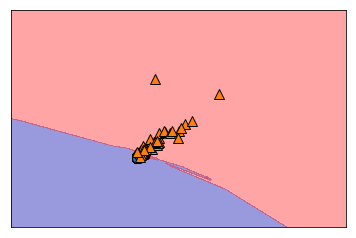

In [38]:
X_b = X_train[1:200,[2,5]]
y_b = y_train[1:200]

knn_classifier_grid_search.fit(X_b, y_b)

mglearn.plots.plot_2d_separator(knn_classifier_grid_search, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
logreg_grid_search = GridSearchCV(lreg, logreg_param_grid, cv=5, return_train_score=True, scoring = 'f1')
logreg_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(logreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(logreg_grid_search.best_score_))
print("Test set score: {:.2f}".format(logreg_grid_search.score(X_test, y_test)))

y_logreg_predict = logreg_grid_search.predict(X_test)
y_logreg_train_predict = logreg_grid_search.predict(X_train)
print('Train f1 score: %.2f'%f1_score(y_logreg_train_predict, y_train))
print('Test f1 score: %.2f '%f1_score(y_logreg_predict, y_test))

report_table1 = report_table1 + [['Logistic Regression', logreg_grid_search.best_params_, logreg_grid_search.score(X_train, y_train), logreg_grid_search.score(X_test, y_test), f1_score(y_logreg_train_predict, y_train), f1_score(y_logreg_predict, y_test) ]]

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.91
Test set score: 0.91
Train f1 score: 0.93
Test f1 score: 0.91 


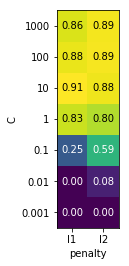

In [40]:
results = pd.DataFrame(logreg_grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(7, 2)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='penalty', xticklabels=logreg_param_grid['penalty'], ylabel='C', yticklabels=logreg_param_grid['C'], cmap="viridis")

## LinearSVC

In [41]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc_param_grid = {}
lsvc_grid_search = GridSearchCV(lsvc, lsvc_param_grid, cv=5, return_train_score=True, scoring = 'f1')
lsvc_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(lsvc_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(lsvc_grid_search.best_score_))
print("Test set score: {:.2f}".format(lsvc_grid_search.score(X_test, y_test)))

y_lsvc_predict = lsvc_grid_search.predict(X_test)
y_lsvc_train_predict = lsvc_grid_search.predict(X_train)
print('Train f1 score: %.2f'%f1_score(y_lsvc_train_predict, y_train))
print('Test f1 score: %.2f '%f1_score(y_lsvc_predict, y_test))

report_table1 = report_table1 + [['Linear SVC', lsvc_grid_search.best_params_, lsvc_grid_search.score(X_train, y_train), lsvc_grid_search.score(X_test, y_test), f1_score(y_lsvc_train_predict, y_train), f1_score(y_lsvc_predict, y_test) ]]

Best parameters: {}
Best cross-validation score: 0.89
Test set score: 0.87
Train f1 score: 0.90
Test f1 score: 0.87 


## SVC with Kernel trick

In [42]:
from sklearn.svm import SVC

svc = SVC()
svc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
svc_grid_search = GridSearchCV(svc, svc_param_grid, cv=5, return_train_score=True, scoring = 'f1')
svc_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(svc_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(svc_grid_search.best_score_))
print("Test set score: {:.2f}".format(svc_grid_search.score(X_test, y_test)))

y_svc_predict = svc_grid_search.predict(X_test)
y_svc_train_predict = svc_grid_search.predict(X_train)
print('Train f1 score: %.2f'%f1_score(y_svc_train_predict, y_train))
print('Test f1 score: %.2f '%f1_score(y_svc_predict, y_test))

report_table1 = report_table1 + [['SVC', svc_grid_search.best_params_, svc_grid_search.score(X_train, y_train), svc_grid_search.score(X_test, y_test), f1_score(y_svc_train_predict, y_train), f1_score(y_svc_predict, y_test) ]]

Best parameters: {'C': 1000, 'gamma': 0.01}
Best cross-validation score: 0.89
Test set score: 0.92
Train f1 score: 0.91
Test f1 score: 0.92 


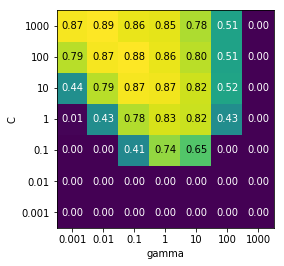

In [43]:
results = pd.DataFrame(svc_grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(7, 7)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=svc_param_grid['gamma'], ylabel='C', yticklabels=svc_param_grid['C'], cmap="viridis")

## Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
d = np.arange(20)+1
dtree_param_grid = {'max_depth': d, 'random_state': [0]}
dtree_grid_search = GridSearchCV(dtree, dtree_param_grid, cv=5, return_train_score=True, scoring = 'f1')
dtree_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(dtree_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(dtree_grid_search.best_score_))
print("Test set score: {:.2f}".format(dtree_grid_search.score(X_test, y_test)))

y_dtree_predict = dtree_grid_search.predict(X_test)
y_dtree_train_predict = dtree_grid_search.predict(X_train)
print('Train f1 score: %.2f'%f1_score(y_dtree_train_predict, y_train))
print('Test f1 score: %.2f '%f1_score(y_dtree_predict, y_test))

report_table1 = report_table1 + [['Decision Tree', dtree_grid_search.best_params_, dtree_grid_search.score(X_train, y_train), dtree_grid_search.score(X_test, y_test), f1_score(y_dtree_train_predict, y_train), f1_score(y_dtree_predict, y_test) ]]

Best parameters: {'max_depth': 1, 'random_state': 0}
Best cross-validation score: 0.92
Test set score: 0.93
Train f1 score: 0.92
Test f1 score: 0.93 


([<matplotlib.axis.XTick at 0x19200baaac8>,
 <a list of 20 Text xticklabel objects>)

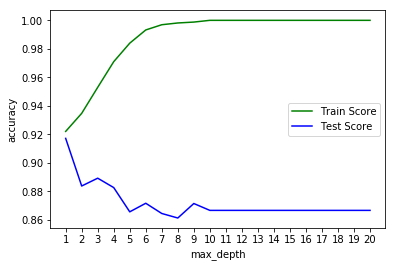

In [45]:
results = pd.DataFrame(dtree_grid_search.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)

x_axis = range(1,21)
my_xticks = dtree_param_grid['max_depth']
plt.plot(x_axis, train_scores, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_scores, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(x_axis, my_xticks)

In [46]:
report1 = pd.DataFrame(report_table1,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train f1 score', 'Test f1 score'])

In [47]:
report1

,Model name,Model parameter,Train accuracy,Test accuracy,Train f1 score,Test f1 score
0,knn,{'n_neighbors': 1},1.000000,0.860759,1.000000,0.860759
1,Logistic Regression,"{'C': 10, 'penalty': 'l1'}",0.927318,0.905660,0.927318,0.905660
2,Linear SVC,{},0.897436,0.868421,0.897436,0.868421
3,SVC,"{'C': 1000, 'gamma': 0.01}",0.914141,0.925000,0.914141,0.925000
4,Decision Tree,"{'max_depth': 1, 'random_state': 0}",0.921951,0.932515,0.921951,0.932515


## Best Model
The best model is Decision Tree because it has a highest test f1 score and the difference between the train and test f1 score is the least. The best parameter value is max_depth of 1. Training on the entire dataset gives the following result:

In [48]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, Y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
dtree.fit(X_train,y_train)

print("Train set score: {:.2f}".format(dtree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(dtree.score(X_test, y_test)))

Train set score: 0.96
Test set score: 0.96
